# Import All Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data and Surface Level Analysis

In [2]:
data = pd.read_csv("D:/kaggle/spaceship-titanic/train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Deeper Analysis

In [6]:
data.drop('Name', axis=1, inplace=True)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [9]:
for col in data:
    print(col, "has", data[col].isnull().sum(), "missing values")

PassengerId has 0 missing values
HomePlanet has 201 missing values
CryoSleep has 217 missing values
Cabin has 199 missing values
Destination has 182 missing values
Age has 179 missing values
VIP has 203 missing values
RoomService has 181 missing values
FoodCourt has 183 missing values
ShoppingMall has 208 missing values
Spa has 183 missing values
VRDeck has 188 missing values
Transported has 0 missing values


In [10]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
object_cols = list(set(data.columns) - set(numeric_cols))

In [11]:
numeric_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [12]:
object_cols

['PassengerId',
 'Cabin',
 'HomePlanet',
 'Transported',
 'CryoSleep',
 'VIP',
 'Destination']

In [13]:
data['Cabin'].str.split("/", expand=True)[2]

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: 2, Length: 8693, dtype: object

In [14]:
data['Cabin'] = data['Cabin'].str.split("/", expand=True)[2]

In [15]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<AxesSubplot:xlabel='Age', ylabel='Density'>

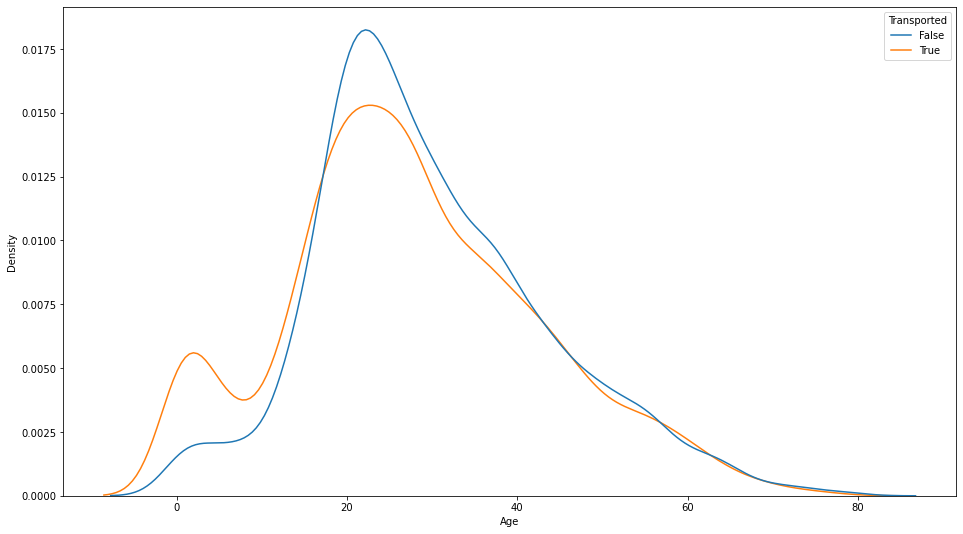

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.kdeplot(data=data, x='Age', hue="Transported", ax=ax)

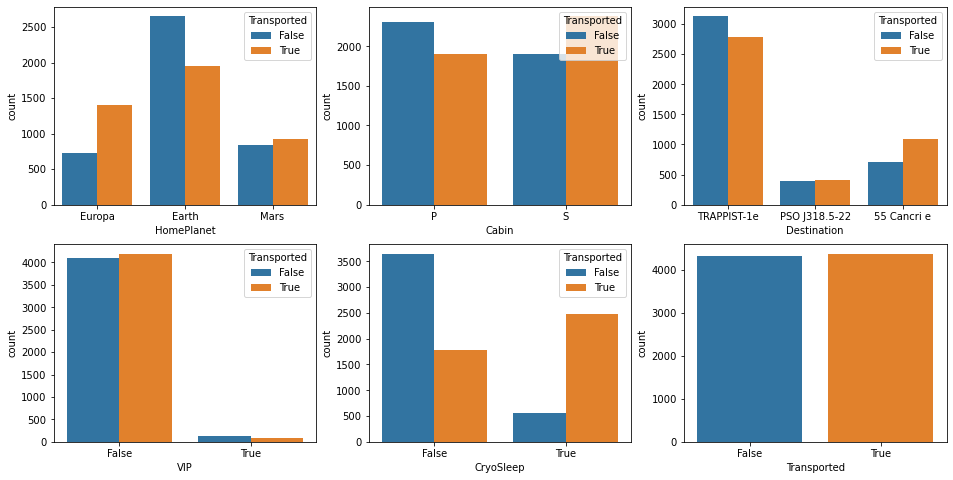

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(data=data, x='HomePlanet', hue="Transported", ax=axes[0][0]);
sns.countplot(data=data, x='CryoSleep', hue="Transported", ax=axes[1][1]);
sns.countplot(data=data, x='Destination', hue="Transported", ax=axes[0][2]);
sns.countplot(data=data, x='VIP', hue="Transported", ax=axes[1][0]);
sns.countplot(data=data, x='Cabin', hue="Transported", ax=axes[0][1]);
sns.countplot(data=data, x='Transported', ax=axes[1][2]);

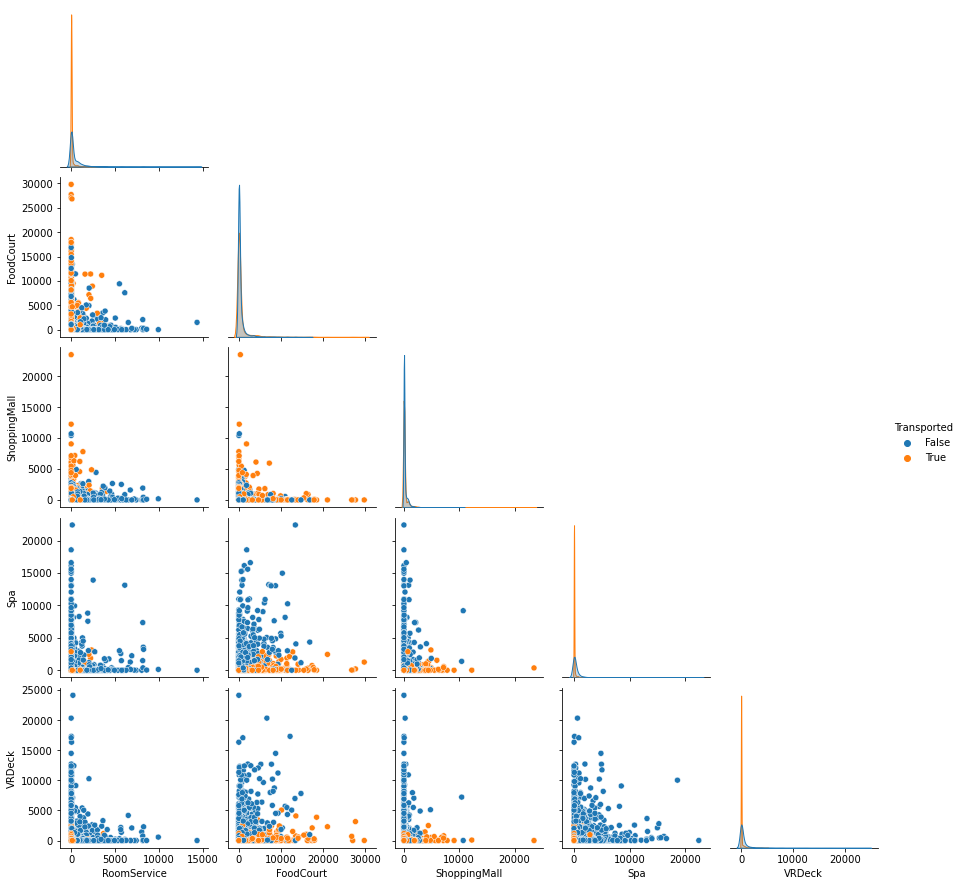

In [18]:
sns.pairplot(data=data, kind="scatter", hue="Transported", diag_kind="auto", corner=True, 
            x_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
            y_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']);

In [30]:
import umap
import umap.plot
dropna = data.dropna()
embedding = umap.UMAP(n_neighbors=10,
                      min_dist=0.3,
                      metric='correlation').fit(dropna[numeric_cols])

In [31]:
embedding

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.3, n_neighbors=10, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

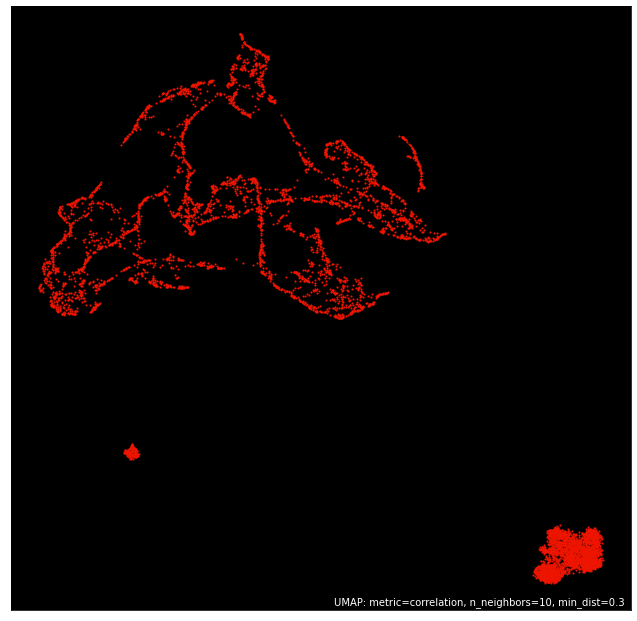

In [32]:
# fig, axes = plt.subplots(2, 2, figsize=(16, 16))
umap.plot.points(embedding, theme='fire')

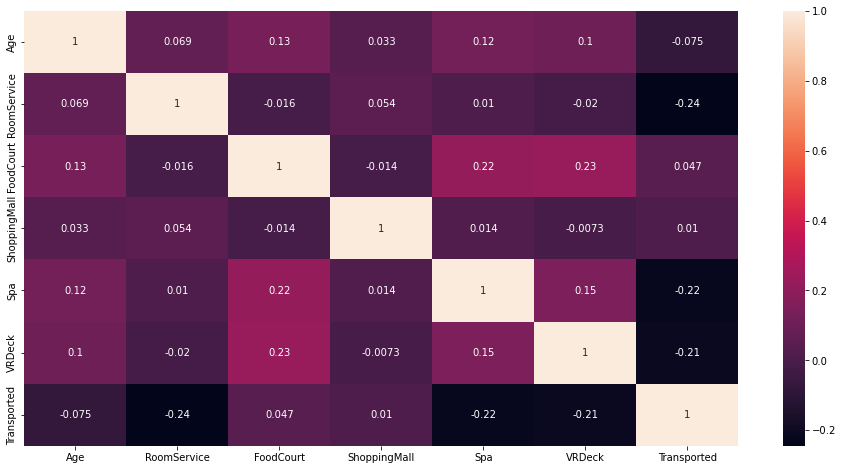

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(data[numeric_cols + ["Transported"]].corr(), annot=True, ax=ax, 
            xticklabels=numeric_cols + ["Transported"],
            yticklabels=numeric_cols + ["Transported"]);